<a href="https://colab.research.google.com/github/AshandPeach/GitColab/blob/main/A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP7404 - Assignment 4

## Part A: Conceptual Questions

Solve the following questions by hand. You can write your answer on a seperate paper (submit as *.pdf) or type it below and submit together with Part B as a single *.ipynb file.


### A1
Consider a Perceptron with 2 inputs and 1 output. Let the weights of the Perceptron be $w_1 = 1$ and $w_2 = 1$ and let the bias be $w_0 = -1.5$. Calculate the output of the following inputs:(0, 0), (1, 0), (0, 1), (1, 1)

As for （0，0）:0* 1+0* 1-1.5=-1.5    
As for （1，0）:1* 1+0* 1-1.5=-0.5    
As for （0，1）:1* 0+1* 1-1.5=-0.5    
As for （1，1）:1* 1+1* 1-1.5=0.5    

### A2
Define a perceptron for the following logical functions: AND, NOT, NAND, NOR

1.AND:And is basically takes a 2 variables which takes the binary input if we take one variable as 1 and other as 0 than output will be 0 while at the case of 0 and 0 it return 1 and in 1 and 1 return 1:    
AND=x1(1)+x2(1)–1    
AND (0,1) = 0    
AND (0,0)= 0    
AND (1,0) = 0   
AND (1,1) = 1    

2.NOT: Not is basically a 1 variable function which takes only one input and gives the output in either true or false.Output will only have only two possible solutions.    
NOT=–x1+1   
NOT (0) = 1    
NOT (1) = 1

3.NAND:the NAND gate is 0 only if both inputs are 1    
NAND=-x1-x2+2   
NAND（0,1）=1   
NAND（1,0）=1   
NAND（1,1）=0   


4.NOR:NOR gate is the combination of two gates the first is NOT and other one is OR gate.The NOR gate is 1 only if both inputs are 0.    
NOR(a,b)=NOT(OR(a,b))   
NOR:-x1-x2+1    


### A3
The parity problem returns 1 if the number of inputs that are 1 is even, and 0 otherwise. Can a perceptron learn this problem for 3 inputs? 


No, we cannot classify it using a single neuron because it will act a XNOR gate

### A4
Suppose that the following are a set of point in two classes:

*   Class1: $(1, 1), (1, 2), (2, 1)$
*   Class2: $(0, 0), (1, 0), (0, 1)$

Plot them and find the optimal separating line. What are the support vectors, and what is the meaning?


*Your answer here*

### A5
Suppose that the probability of five events are $P(first) = 0.5, P(second) = P(third) = P(fourth) = P(fifth) = 0.125$. Calculate the entropy and write down in words what this means. 


0.5 log2(1/0.5)+0.125 log2(1/0.125)+0.125 log2(1/0.125)+0.125 log2(1/0.125)+0.125 log2(1/0.125)=2    
It means the average amount of information from the event is 2.

### A6
Design a decision tree that computes the logical AND function. How does it compare to the Perceptron solution?

*Your answer here*

### A7
Turn the following politically incorrect data into a decision tree to classify which attributes make a person attractive, and then extract the rules. Use the Gini Impurity.

| Height  | Hair  | Eyes  | Attractive?  |
|:-:|:-:|:-:|:-:|
| Small  | Blonde  | Brown  | No  |
| Tall  | Dark  | Brown  | No  |
| Tall  | Blonde  | Blue  | Yes  |
| Tall  | Dark  | Blue  | No  |
| Small  | Dark  | Blue  | No  |
| Tall  | Red  | Blue  | Yes  |
| Tall  | Blonde  | Brown  | No  |
| Small  | Blonde  | Blue  | Yes  |


*Your answer here*

### A8
Suppose we collect data for a group of students in a postgraduate machine learning class with features $x_1$ = hours studies, $x_2$ = undergraduate GPA and label $y$ = receive an A. We fit a logistic regression and produce estimated weights as follows: $w_0 = -6$, $w_1 = 0.05$, $w_2 = 1$.

1.  Estimate the probability that a student who studies for 40h and has an undergraduate GPA of 3.5 gets an A in the class
2.  How many hours would the student in part 1. need to study to have a 50% chance of getting an A in the class?

*Your answer here*

### A9
Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e., K=1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

*Your answer here*

### A10

Suppose the features in your training set have very different scales. Which algorithms discussed in class might suffer from this, and how? What can you do about it?


*Your answer here*

### A11


If your AdaBoost ensemble underfits the training data, which hyperparameters should you tweak and how?

*Your answer here*

### A12

What is the benefit of out-of-bag evaluation?

*Your answer here*

### A13

What is the difference between hard and soft voting classifiers?

*Your answer here*

## Part B: Applied Questions

Solve the following questions by implementing solutions in code.

### B1
Consider the following Perceptron code.

In [ ]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
import pandas as pd

data_src = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(data_src, header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


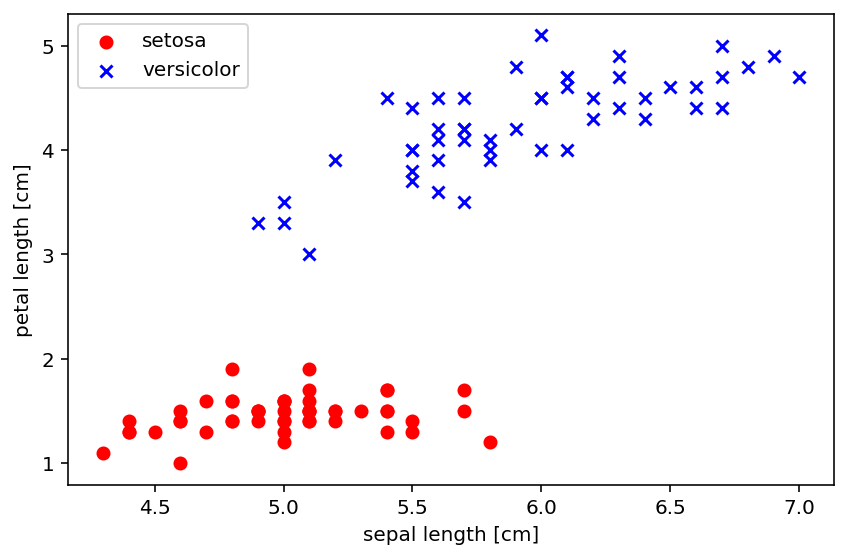

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn = ppn.fit(X, y)

In [ ]:
from matplotlib.colors import ListedColormap

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

As shown in function plot_decision_regions, the decision regions can be visualized by dense sampling via meshgrid. However, if the grid resolution is not enough, as artificially set below, the boundary will appear inaccurate.

Implement function plot_decision_boundary below to analytically compute and plot the decision boundary.

In [ ]:
def plot_decision_boundary(X, y, classifier):    
    
    # replace the two lines below with your code
    x1_interval = [X[:, 0].min() - 1, X[:, 0].max() + 1]
    x2_interval = [X[:, 1].min() - 1, X[:, 1].max() + 1]
    
    plt.plot(x1_interval, x2_interval, color='green', linewidth=4, label='boundary')

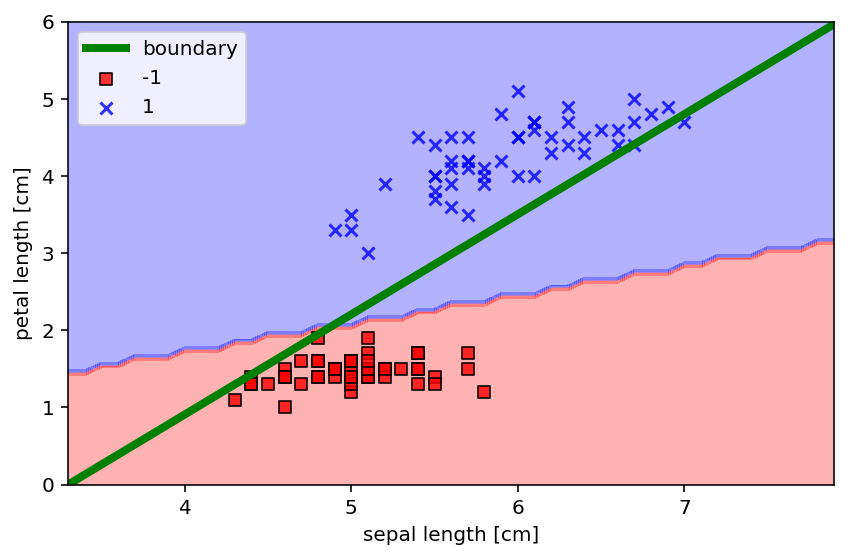

In [ ]:
low_res = 0.1 # intentional for this exercise
plot_decision_regions(X, y, classifier=ppn, resolution=low_res)
plot_decision_boundary(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### B2

In class we applied different scikit-learn classifers for the Iris data set.

In this question, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters, and compare their performance via the accuracy score as in the Iris dataset.
Which classifier(s) perform(s) the best and worst, and why?

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN

The dataset is available as part of scikit learn, as follows.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


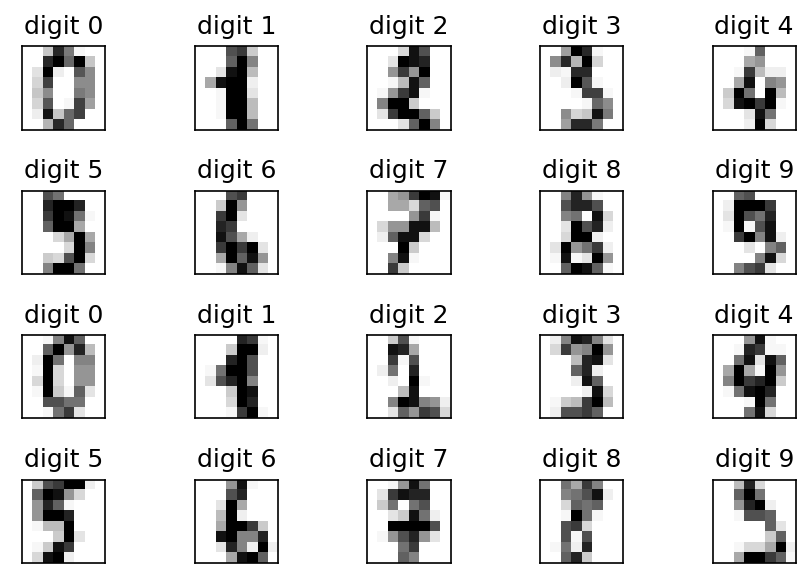

In [ ]:
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()
for index in range(num_rows*num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap='Greys', interpolation='nearest')
    ax[index].set_title('digit ' + str(label))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Date Preprocessing

Hint: Divide training and test data set and apply other techinques we have learned if needed.

In [ ]:
#Your code comes here
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=420)

In [ ]:
train_x.shape

(1257, 64)

In [ ]:
train_y.shape

(1257,)

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
#Z-score normalization
norm = preprocessing.StandardScaler()
train_norm_x = norm.fit_transform(train_x)
test_norm_x = norm.transform(test_x)

Classifier #1 Perceptron

In [ ]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(train_norm_x, train_y)
predict_y = p.predict(test_norm_x)
print('Perceptron acc: %0.4lf' % accuracy_score(test_y, predict_y))

Perceptron acc: 0.9315


Classifier #2 Logistic Regression

In [ ]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_norm_x, train_y)
predict_y = lr.predict(test_norm_x)
print('LogisticRegression acc: %0.4lf' % accuracy_score(test_y, predict_y))

LogisticRegression acc: 0.9685


Classifier #3 SVM

In [ ]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.svm import SVC
svm = SVC()
svm.fit(train_norm_x, train_y)
predict_y = svm.predict(test_norm_x)
print('SVM acc: %0.4lf' % accuracy_score(test_y, predict_y))

SVM acc: 0.9778


Classifier #4 Decision Tree

In [ ]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train_norm_x, train_y)
predict_y = dtc.predict(test_norm_x)
print('DecisionTree acc: %0.4lf' % accuracy_score(test_y, predict_y))

DecisionTree acc: 0.8611


Classifer #5 Random Forest

In [25]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = DecisionTreeClassifier()
rfc.fit(train_norm_x, train_y)
predict_y = rfc.predict(test_norm_x)
print('Random Forest acc: %0.4lf' % accuracy_score(test_y, predict_y))

Random Forest acc: 0.8630


Classifier #6 KNN

In [ ]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.neighbors import KNeighborsClassifier
#train and test
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(train_norm_x, train_y)
predict_y = knn.predict(test_norm_x)
print("KNN acc: %.4lf" % accuracy_score(test_y, predict_y))

KNN acc: 0.9741


### B3
Build a spam classifier:



*   Download examples of spam and ham from Apache SpamAssassin’s public datasets.
*   Unzip the datasets and familiarize yourself with the data format.
*   Split the datasets into a training set and a test set.
*   Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello,” “how,” “are,” “you,” then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word.
*   You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL,” replace all numbers with “NUMBER,” or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this).

*   Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.

In [54]:
#Your answer here

'''

note: using google colab temporary session to store files
 
SPAM_URL = 'https://spamassassin.apache.org/old/publiccorpus/20050311_spam_2.tar.bz2'
EASY_HAM_URL = 'https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham_2.tar.bz2'
HARD_HAM_URL = 'https://spamassassin.apache.org/old/publiccorpus/20030228_hard_ham.tar.bz2'

'''
spam_folder = '/spampath/'
spam_dir = '/spampath/20050311_spam_2.tar.bz2'
easy_ham_dir = '/spampath/20030228_easy_ham_2.tar.bz2'
hard_ham_dir = '/spampath/20030228_hard_ham.tar.bz2'

In [55]:
#unzip files
import shutil
shutil.unpack_archive(spam_dir, spam_folder)
shutil.unpack_archive(easy_ham_dir, spam_folder)
shutil.unpack_archive(hard_ham_dir, spam_folder)

In [62]:
spam_dir_ = '/spampath/spam_2'
easy_ham_dir_ = '/spampath/easy_ham_2'
hard_ham_dir_ = '/spampath/hard_ham'

In [59]:
import numpy as np
import glob

def load_dataset(dirpath):
    """load emails from the specified directory"""
    
    files = []
    filepaths = glob.glob(dirpath + '/*')
    print(filepaths)
    for path in filepaths:
        with open(path, 'rb') as f:
            byte_content = f.read()
            str_content = byte_content.decode('utf-8', errors='ignore')
            files.append(str_content)
    return files

In [63]:
# load the datasets
spam = load_dataset(spam_dir_)
easy_ham = load_dataset(easy_ham_dir_)
hard_ham = load_dataset(hard_ham_dir_)

['/spampath/spam_2/01392.891b7eeda19704fc8a990e56e0b52f89', '/spampath/spam_2/00093.f0f5881aff74fafe925b36649298a0aa', '/spampath/spam_2/00446.dbbe3d81a19420ba8c135ac7f044319c', '/spampath/spam_2/01154.dc96d527593e053228ad2b9111e8ad36', '/spampath/spam_2/00919.0b677a6b8d8bff153989d1708850f985', '/spampath/spam_2/00738.10deb784a63c0bdc5e78b019720f3e9f', '/spampath/spam_2/00594.3381bb07fec959ae2285b219cc18eb62', '/spampath/spam_2/01306.d37be8871ac501758c6854fbef9cbdd2', '/spampath/spam_2/00993.32d00ccd0a831830838667fed1371d5f', '/spampath/spam_2/01023.1f96236c94e92482c058e950ccd7a590', '/spampath/spam_2/01312.c19bb76293853f6c10871018cebbe8ca', '/spampath/spam_2/00414.583be7dd0ab2492309a3fbd7960e90be', '/spampath/spam_2/01075.07ee7f1ab5ad6659c47baa5ef3691a80', '/spampath/spam_2/01096.ccf870cba7e6618b610f8a2f2c2f08f6', '/spampath/spam_2/00545.296b31ed5391f5e3674c734171643f45', '/spampath/spam_2/01257.f5908ef0550cdf91bd6ae55120ecb5ce', '/spampath/spam_2/00773.1ef75674804a6206f957afddcb5ed0c

In [66]:
import sklearn.utils

# create and concat
X = spam + easy_ham + hard_ham
y = np.concatenate((np.ones(len(spam)), np.zeros(len(easy_ham) + len(hard_ham))))

# shuffle
X, y = sklearn.utils.shuffle(X, y, random_state=42)

In [69]:
from sklearn.model_selection import train_test_split

# split the data into stratified training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3
                            ,stratify=y,random_state=420)

In [78]:
# check dataset shapes
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

2134 2134
915 915


In [87]:
#Data Preparation Pipeline

# def remove_header(email):
#     """remove the header from an email"""
#     return email[email.index('\n\n'):]

import re 
def is_url(s):
    url = re.match("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|"
                     "[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", s)
    return url is not None

def convert_url_to_word(words):
    """convert all urls in the list to the word 'URL'"""
    for i, word in enumerate(words):
        if is_url(word):
            words[i] = 'URL'
    return words

def convert_num_to_word(words):
    """convert all numbers in the list to the word 'NUM'"""
    for i, word in enumerate(words):
        if word.isdigit():
            words[i] = 'NUM'
    return words

def remove_punctuation(email):
    new_email = ""
    for c in email:
        if c.isalnum() or c.isspace():
            new_email += c
    return new_email

In [88]:
from sklearn.base import BaseEstimator, TransformerMixin

class CleanEmails(BaseEstimator, TransformerMixin):
    def __init__(self, no_header=True, to_lowercase=True, url_to_word=True, num_to_word=True,
                 remove_punc=True):
        self.no_header = no_header
        self.to_lowercase = to_lowercase
        self.url_to_word = url_to_word
        self.num_to_word = num_to_word
        self.remove_punc = remove_punc
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_cleaned = []
        for email in X:
            # if self.no_header:
            #     email = remove_header(email)
            if self.to_lowercase:
                email = email.lower()
            
            email_words = email.split()
            if self.url_to_word:
                email_words = convert_url_to_word(email_words)
            if self.num_to_word:
                email_words = convert_num_to_word(email_words)
            email = ' '.join(email_words)
            if self.remove_punc:
                email = remove_punctuation(email)
            X_cleaned.append(email)
        return X_cleaned

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

# full preparation pipeline
prepare_pipeline = Pipeline([
    ('clean_email', CleanEmails()),
    ('bag_of_words', CountVectorizer())
])

In [90]:
# prepare the training data
X_train_prepared = prepare_pipeline.fit_transform(X_train)
print(X_train_prepared.shape)

(2134, 128756)


In [91]:
#Train and Evaluate some Classifiers
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# classification models
lr = LogisticRegression()
p = Perceptron()
tree_clf = DecisionTreeClassifier()
forest_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()
svm_clf = SVC()
mlp_clf = MLPClassifier(hidden_layer_sizes=(16,))


classifiers = {
    'lr': lr,
    'p': p,
    'Decision Tree': tree_clf,
    'Random Forest': forest_clf,
    'KNN': knn_clf,
    'SVM': svm_clf,
    'MLP': mlp_clf
}

In [ ]:
from sklearn.model_selection import cross_val_predict

# make predictions using each model
y_preds = {}
for clf_name, clf in classifiers.items():
    y_preds[clf_name] = cross_val_predict(clf, X_train_prepared, y_train, cv=3)

In [93]:
from sklearn.metrics import accuracy_score

# evaluate each classifier's accuracy
for clf_name, y_pred in y_preds.items():
    print("{}:".format(clf_name))
    print(accuracy_score(y_train, y_pred))
    print()

lr:
0.9732895970009372

p:
0.96485473289597

Decision Tree:
0.9465791940018744

Random Forest:
0.9540768509840675

KNN:
0.9465791940018744

SVM:
0.9409559512652296

MLP:
0.9756326148078726



In [96]:
from sklearn.metrics import precision_score, recall_score

def eval_precision_recall(y_pred, y_true=y_train):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return {'precision': precision, 'recall': recall}

In [97]:
# evaluate the confusion matrix, precision, recall and f1 score for each classifier
for clf_name, y_pred in y_preds.items():
    result = eval_precision_recall(y_pred)
    print("{}:".format(clf_name))
    print("precision: {}".format(result['precision']))
    print("recall: {}".format(result['recall']))

lr:
precision: 0.9665653495440729
recall: 0.9754601226993865
p:
precision: 0.9640287769784173
recall: 0.9591002044989775
Decision Tree:
precision: 0.941717791411043
recall: 0.941717791411043
Random Forest:
precision: 0.9480651731160896
recall: 0.9519427402862985
KNN:
precision: 0.9426229508196722
recall: 0.9406952965235174
SVM:
precision: 0.9522292993630573
recall: 0.9171779141104295
MLP:
precision: 0.9667338709677419
recall: 0.9805725971370143
